# PHY1024 - Introduction to Python Programming, week 4

The lecture materials, worksheets, and assignments can all be found here:

http://go.qub.ac.uk/phy1024y2016


## Worksheet materials

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# the next line is only for ipython notebooks:
%matplotlib inline
from IPython.display import Image


The goal for this week's computer labs (once you're finished with last week's Assignment) is to figure out by how much an observed exoplanet transit is shifted in time, compared to the expected transit time. I.e., we'll look at transit timing variations.

In particular, we will look at the data set pictured in red in this image: 


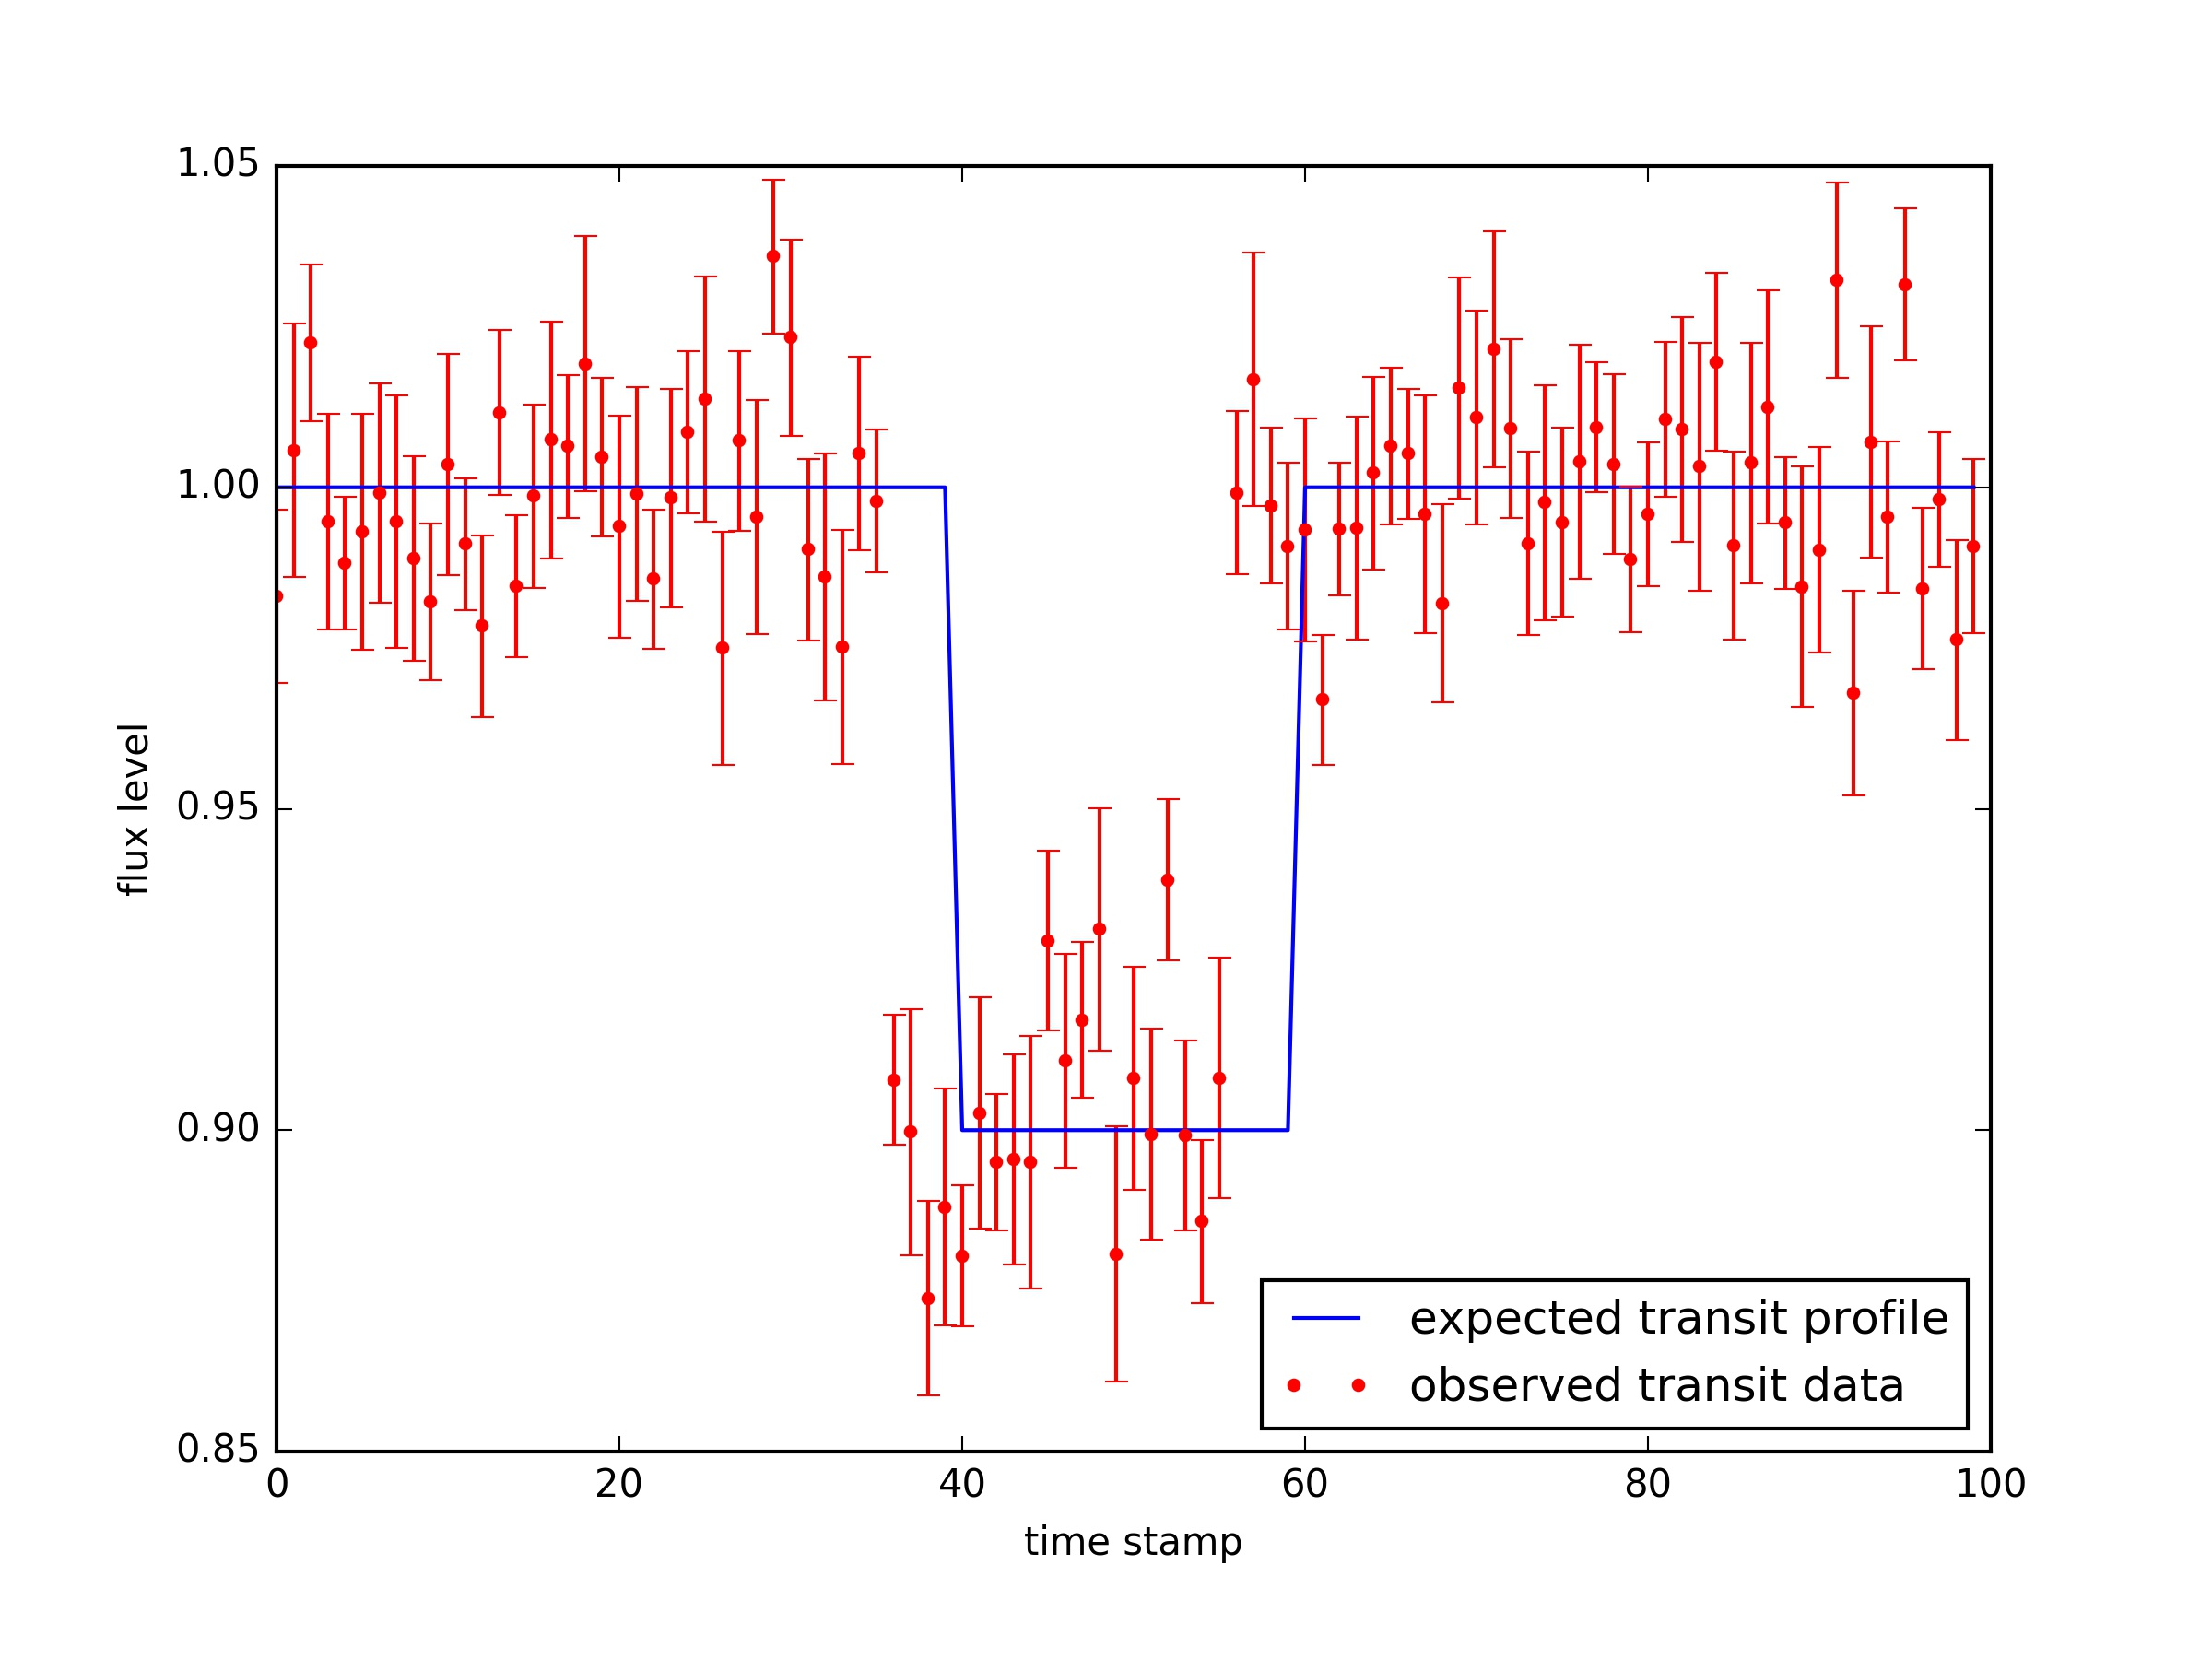

In [30]:
Image(filename='TTV_example.jpg', width=800) 

The blue line with the dip represents the expected trasnit; it should occur starting at the time stamp 40 on the X axis. However, as we can already see by eye, the red data point indicate that the transit actually occurred earlier than expected (and as we saw in the lecture, this is a hint that there is at least one other exoplanet in that system).

Your job is to use the chi-squared statistics to find the best for to the red data points. The variable quantity you will be fitting is the time stamp of the transit start-time.

Here is the red data set; t is the time stamps of the measurements, y is the measurements themselves, and e is the error bars for each data point. You can just copy and paste the following arrays into your python editor. **You have to open the html version of the worksheet for the copy & paste to work (it doesn't work with the pdf version).**

In [36]:
t = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
              17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
              34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
              51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
              68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
              85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [37]:
y = np.array([ 0.98299242,  1.00576479,  1.02244831,  0.99466927,  0.988187  ,
        0.99310842,  0.99911247,  0.9946874 ,  0.98896715,  0.9822409 ,
        1.00358341,  0.9911512 ,  0.97839122,  1.01160555,  0.98458049,
        0.99863521,  1.00738005,  1.00637008,  1.01924573,  1.0047398 ,
        0.99387877,  0.99898079,  0.9857136 ,  0.99833984,  1.00855891,
        1.0137313 ,  0.97495989,  1.0072407 ,  0.99534291,  1.03592035,
        1.02326396,  0.99030302,  0.98606594,  0.97517536,  1.00525289,
        0.99787365,  0.90781623,  0.89968649,  0.87384234,  0.88801262,
        0.88044644,  0.90267158,  0.89498396,  0.89540959,  0.89501392,
        0.92944421,  0.91078864,  0.9171433 ,  0.93124315,  0.88073028,
        0.90807191,  0.89933191,  0.93895747,  0.89912601,  0.8858207 ,
        0.90811759,  0.99917487,  1.01680031,  0.99712536,  0.99084792,
        0.99333132,  0.96693986,  0.99353994,  0.9936236 ,  1.00220938,
        1.00637386,  1.00520887,  0.99585647,  0.98196557,  1.01546535,
        1.01084978,  1.02149168,  1.0091426 ,  0.99123767,  0.99763188,
        0.9945557 ,  1.00402103,  1.00932981,  1.00357254,  0.98876225,
        0.99581528,  1.01052433,  1.00899017,  1.00323112,  1.019498  ,
        0.99094549,  1.00378366,  1.01247275,  0.99446217,  0.98455096,
        0.99028627,  1.03223901,  0.96794465,  1.00699628,  0.99536718,
        1.03154684,  0.98424404,  0.9980933 ,  0.97623804,  0.99083388])

In [38]:
e = np.array([ 0.01346741,  0.01974374,  0.01215581,  0.01682843,  0.0103181 ,
        0.01835383,  0.01701652,  0.01965944,  0.01591816,  0.01217345,
        0.01719226,  0.0103087 ,  0.01418708,  0.01281225,  0.01106244,
        0.01426346,  0.01840578,  0.01110411,  0.01986652,  0.01233293,
        0.01721412,  0.01660892,  0.01077757,  0.01697284,  0.01265306,
        0.01901838,  0.01818264,  0.01399233,  0.01820285,  0.01197815,
        0.01522525,  0.01412475,  0.01925834,  0.0182538 ,  0.0150103 ,
        0.01116789,  0.01011592,  0.0191315 ,  0.01512397,  0.01843082,
        0.01094847,  0.01803427,  0.01062228,  0.01635494,  0.01968781,
        0.01397432,  0.01659587,  0.01214867,  0.01889866,  0.01986632,
        0.01738675,  0.01641487,  0.01252156,  0.01475809,  0.01268057,
        0.01868261,  0.01266889,  0.01973016,  0.01213556,  0.01297775,
        0.01736769,  0.01012891,  0.01030234,  0.01733823,  0.01498257,
        0.01218067,  0.0100893 ,  0.01850703,  0.01536407,  0.01723507,
        0.0166155 ,  0.01838781,  0.01388195,  0.01426181,  0.0182813 ,
        0.01469009,  0.01820033,  0.01014177,  0.01396764,  0.01128346,
        0.01118087,  0.01205984,  0.01747628,  0.01930086,  0.01380653,
        0.01460593,  0.01873363,  0.01814521,  0.01024973,  0.01873008,
        0.01604551,  0.01516438,  0.01589285,  0.01799811,  0.01173281,
        0.01186865,  0.01258171,  0.01051066,  0.01552642,  0.01351848])

Now some helpful hints. First, the fixed parameters for your transit model:

flux level outside of transit: 1.0

flux level inside of transit: 0.9

transit duration: 20 time units (i.e. for example time stamps 40 to 59, including 59, would have lower flux level)

We are using a very simple transit model where the flux drops instantaneously from 1.0 to 0.9, i.e. there is no gradual decline or rise in the model or the data.

The one parameter you will be changing is the transit start-time.

To make life a bit easier, I can tell you that the data has an integer transit start-time (i.e. you don't have to worry about a transit starting *between* two time stamps.)

Some more helpful hints:

There are several ways to do this. One rather convenient way you may want to think about is writing two functions:

1) One function that calculates the model itself, given a specific start time for the transit. The output of that function should be an array with the same size as the data array, and this output array has the transit starting at the specific time stamp that was given as the input.

2) A second function which uses the data, the error bars, and the model from the first function to calculate the chi-squared statistic for this specific version of the model compared to the data and error bars.

You would then want to calculate all possible models and see which one produces the smallest chi-squared. This would be your best-fitting model.

Here are some more questions to think about:

- When does the instruction "calculate all possible models" become difficult?

- Imagine we had one million data points. Could we find a good fit to the data without having to calculate all possible models?

- If you didn't have the information that the transit start time is an integer, what would change in your approach?

